In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [97]:
global_df = pd.read_csv('Resource/Global_Terrorism.csv', encoding='ISO-8859-1')
global_df.head()

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# What is the most common type of attack?

In [207]:
Attack_Type= global_df["attacktype1_txt"].unique()
Attack_Type

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [208]:
Attack_Count = global_df["attacktype1_txt"].value_counts()
Attack_Count

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

Text(0.5, 1.0, 'Global Terrorism: Attack Occurence')

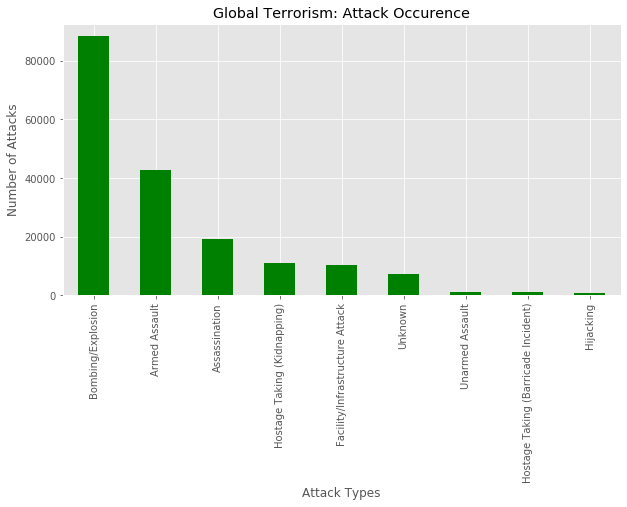

In [100]:
Attack_Count.plot(kind="bar", facecolor = "green", figsize=(10,5))

plt.xlabel("Attack Types")
plt.ylabel("Number of Attacks")
plt.title("Global Terrorism: Attack Occurence")


# Trend of attack type over the years

In [209]:
AttackTrend = pd.DataFrame(global_df, columns = ["eventid", "attacktype1_txt", "iyear"])

In [210]:
Attack_Count = AttackTrend.groupby(["attacktype1_txt"]).count()
Attack_Count = AttackTrend.sort_values(by="eventid", ascending=False)
Attack_Count.head()

,eventid,attacktype1_txt,iyear
181690,2.017120e+11,Bombing/Explosion,2017
181186,2.017120e+11,Bombing/Explosion,2017
181195,2.017120e+11,Bombing/Explosion,2017
181194,2.017120e+11,Hostage Taking (Kidnapping),2017
181193,2.017120e+11,Armed Assault,2017


In [211]:
Attack_Count = Attack_Count.groupby(["attacktype1_txt", "iyear"]).count()
Attack_Count = Attack_Count.reset_index()
Attack_Count.head()

,attacktype1_txt,iyear,eventid
0,Armed Assault,1970,61
1,Armed Assault,1971,44
2,Armed Assault,1972,63
3,Armed Assault,1973,62
4,Armed Assault,1974,46


In [178]:
Attack_Count["attacktype1_txt"].unique()

array(['Armed Assault', 'Assassination', 'Bombing/Explosion',
       'Facility/Infrastructure Attack', 'Hijacking',
       'Hostage Taking (Barricade Incident)',
       'Hostage Taking (Kidnapping)', 'Unarmed Assault', 'Unknown'],
      dtype=object)

<Figure size 2160x1080 with 0 Axes>

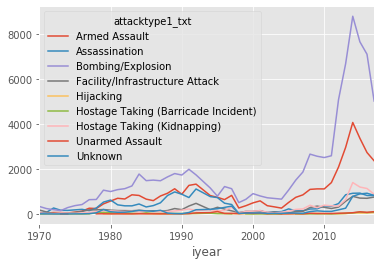

In [179]:
plt.figure(figsize=(30,15))
Attack_Count.pivot(index="iyear", columns="attacktype1_txt", values="eventid").plot()
plt.show()

# What is the most popular attack type by region?

In [212]:
Region_Attack = pd.DataFrame(global_df, columns = ["eventid", "attacktype1_txt", "region_txt"])
Region_Attack.head()

,eventid,attacktype1_txt,region_txt
0,1.970000e+11,Assassination,Central America & Caribbean
1,1.970000e+11,Hostage Taking (Kidnapping),North America
2,1.970010e+11,Assassination,Southeast Asia
3,1.970010e+11,Bombing/Explosion,Western Europe
4,1.970010e+11,Facility/Infrastructure Attack,East Asia


In [213]:
Region_Count = Region_Attack.groupby(["attacktype1_txt"]).count()
Region_Count = Region_Attack.sort_values(by="eventid", ascending=False)
Region_Count.head()

,eventid,attacktype1_txt,region_txt
181690,2.017120e+11,Bombing/Explosion,Southeast Asia
181186,2.017120e+11,Bombing/Explosion,Sub-Saharan Africa
181195,2.017120e+11,Bombing/Explosion,Middle East & North Africa
181194,2.017120e+11,Hostage Taking (Kidnapping),Sub-Saharan Africa
181193,2.017120e+11,Armed Assault,Sub-Saharan Africa


In [215]:
Region_Count = Region_Attack[Region_Attack["attacktype1_txt"].isin(["Bombing/Explosion", "Armed Assault", "Assassination", ])]
Region_Count = Region_Count.groupby(["region_txt", "attacktype1_txt"]).count()

Region_Count.head()

eventid
region_txt                  attacktype1_txt           
Australasia & Oceania       Armed Assault           51
                            Assassination           36
                            Bombing/Explosion       75
Central America & Caribbean Armed Assault         4361
                            Assassination         1254

In [216]:
Region_Count.unstack(level=1)

eventid                                
attacktype1_txt             Armed Assault Assassination Bombing/Explosion
region_txt                                                               
Australasia & Oceania                  51            36                75
Central America & Caribbean          4361          1254              3239
Central Asia                          116           115               235
East Asia                             117            55               330
Eastern Europe                       1274           400              2766
Middle East & North Africa           9273          4206             30908
North America                         448           255              1534
South America                        3875          2745              9039
South Asia                          11404          4301             21246
Southeast Asia                       4022          1369              4818
Sub-Saharan Africa                   6004          1638              5557
Western Europe                       1724          2938              8508

In [221]:
Region_Count.reset_index(inplace = True)
Region_Count

,index,region_txt,attacktype1_txt,eventid
0,0,Australasia & Oceania,Armed Assault,51
1,1,Australasia & Oceania,Assassination,36
2,2,Australasia & Oceania,Bombing/Explosion,75
3,3,Central America & Caribbean,Armed Assault,4361
4,4,Central America & Caribbean,Assassination,1254
5,5,Central America & Caribbean,Bombing/Explosion,3239
6,6,Central Asia,Armed Assault,116
7,7,Central Asia,Assassination,115
8,8,Central Asia,Bombing/Explosion,235
9,9,East Asia,Armed Assault,117


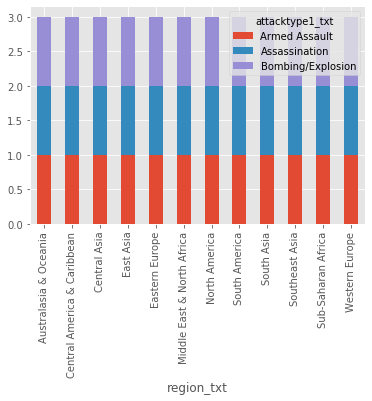

In [226]:
Region_Graph= Region_Count.groupby(["region_txt", "attacktype1_txt"]).size().unstack().plot(kind="bar", stacked=True)

plt.show()

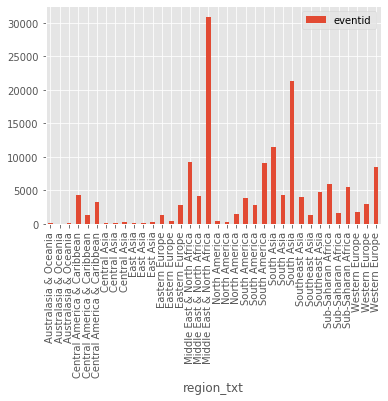

In [204]:
Region_Count.plot(x="region_txt", y="eventid", kind="bar")

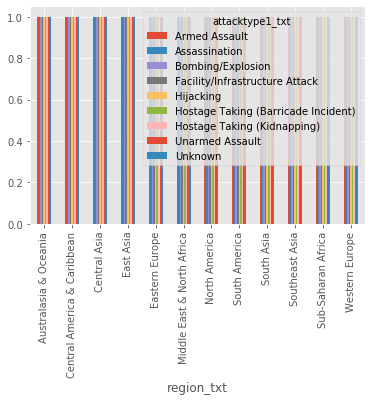

In [151]:
Region_Count.groupby(["region_txt", "attacktype1_txt"]).size().unstack(fill_value=0).plot.bar()
plt.show()